In [4]:
# pip install spotipy

# greatest_hits_ever_df.drop(['track_id'], axis=1)
# greatest_hits_ever_df
# greatest_hits_ever_df.to_csv('greatest_hits_ever.csv')

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statistics as stat

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

In [6]:
cid = 'xxxxxxxxxxxxxxxxxxxxxxxxxxxxxx'
secret = 'xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx'
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

In [7]:
# 1000 of the greatest hits ever: Iris Fernanda 0hKruppKCtqPcSYgnCCVBg
# sp.user_playlist_tracks("Iris Fernanda","0hKruppKCtqPcSYgnCCVBg")

In [8]:
def get_playlist_tracks(username,playlist_id):
    results = sp.user_playlist_tracks(username,playlist_id)
    tracks = results['items']
    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])
    return tracks

def get_songs(username, playlist_id):
    
    # Create empty dataframe
    playlist_features_list = ["artist","album","track_name","track_id","danceability","energy","key","loudness","mode","speechiness","instrumentalness","liveness","valence","tempo", "duration_ms","time_signature"]
    
    playlist_df = pd.DataFrame(columns = playlist_features_list)
    
    # Loop through every track in the playlist, extract features and append the features to the playlist df
    
    playlist = get_playlist_tracks(username, playlist_id)
    
    for track in playlist:
        # Create empty dict
        playlist_features = {}
        
        # Get metadata
        playlist_features["artist"] = track["track"]["album"]["artists"][0]["name"]
        playlist_features["album"] = track["track"]["album"]["name"]
        playlist_features["track_name"] = track["track"]["name"]
        playlist_features["track_id"] = track["track"]["id"]
        
        playlist_features["popularity"] = track["track"]["popularity"]
        playlist_features["duration"] = track["track"]["duration_ms"]
        playlist_features["date"] = track["track"]["album"]["release_date"]
        playlist_features["explicit"] = track["track"]["explicit"]
        
        # Get audio features
        audio_features = sp.audio_features(playlist_features["track_id"])[0]
        for feature in playlist_features_list[4:]:
            playlist_features[feature] = audio_features[feature]
        
        # Concat the dfs
        track_df = pd.DataFrame(playlist_features, index = [3])
        playlist_df = pd.concat([playlist_df, track_df], ignore_index = True)
        
    return playlist_df

In [9]:
df_original = get_songs("Iris Fernanda","0hKruppKCtqPcSYgnCCVBg")

In [10]:
df = df_original.drop(['track_id', 'duration_ms'], axis=1)

In [11]:
# before conducting any EPA check the df for missing values
pd.isnull(df).sum()

artist              0
album               0
track_name          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
popularity          0
duration            0
date                0
explicit            0
dtype: int64

In [12]:
# change the numeric columns from 'object' data type to a numeric data type
# select columns
cols = df.columns.drop(['artist', 'album', 'track_name', 'date','popularity', 'duration'])

# subset of columns, apply function to_numeric to them
df[cols] = df[cols].apply(pd.to_numeric, errors = 'coerce')

df['date'] = df['date'].apply(pd.to_datetime, errors = 'coerce')

# see if it worked
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   artist            1000 non-null   object        
 1   album             1000 non-null   object        
 2   track_name        1000 non-null   object        
 3   danceability      1000 non-null   float64       
 4   energy            1000 non-null   float64       
 5   key               1000 non-null   int64         
 6   loudness          1000 non-null   float64       
 7   mode              1000 non-null   int64         
 8   speechiness       1000 non-null   float64       
 9   instrumentalness  1000 non-null   float64       
 10  liveness          1000 non-null   float64       
 11  valence           1000 non-null   float64       
 12  tempo             1000 non-null   float64       
 13  time_signature    1000 non-null   int64         
 14  popularity        1000 no

In [13]:
# convert duration from milliseconds to seconds
df['duration'] = df['duration'].apply(lambda x: round(x/1000))
df['year'] = df['date'].dt.year
df = df[df['year'] < 2020]
df

,artist,album,track_name,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,time_signature,popularity,duration,date,explicit,year
0,Various Artists,Singin' in the Rain (Original Motion Picture S...,Singin' In The Rain,0.354,0.241,5,-13.811,1,0.0334,0.000274,0.1650,0.4080,135.646,4,54.0,294,1952-04-11,False,1952
1,Various Artists,Rare Rock 'n Roll Essentials,Kansas City,0.720,0.539,0,-13.298,1,0.0453,0.000017,0.2580,0.8160,121.174,4,7.0,166,2013-03-15,False,2013
2,Nat King Cole,Unforgettable,Unforgettable,0.349,0.182,5,-13.507,1,0.0310,0.015200,0.1430,0.1780,136.094,3,67.0,192,1954-01-01,False,1954
3,The Platters,The Magic Touch: An Anthology,Only You (And You Alone),0.486,0.231,3,-12.060,1,0.0354,0.000000,0.1250,0.3030,80.049,4,55.0,157,1991-01-01,False,1991
4,Bo Diddley,Bo Diddley,I'm A Man,0.513,0.546,0,-15.672,1,0.0391,0.000000,0.1700,0.8340,85.527,4,55.0,165,1958-01-01,False,1958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Tom Jones,Reload,Sexbomb,0.801,0.876,8,-3.940,0,0.0446,0.000014,0.1040,0.9320,122.980,4,0.0,212,1999-01-01,False,1999
996,Jamiroquai,Synkronized,Canned Heat,0.700,0.865,9,-5.827,0,0.1330,0.000076,0.0718,0.7800,128.040,4,6.0,332,1999-06-08,False,1999
997,Santana,Supernatural (Legacy Edition),Smooth,0.609,0.923,9,-3.908,1,0.0338,0.000005,0.2950,0.9610,115.994,4,0.0,295,1999-01-01,False,1999
998,Pet Shop Boys,Nightlife,New York City Boy,0.720,0.990,2,-4.796,0,0.0473,0.000070,0.2230,0.8780,130.972,4,30.0,315,1999-10-08,False,1999


In [14]:
new_df = df

sig = stat.stdev(df['danceability'])
mu = stat.mean(df['danceability'])
new_df['danceability'] = (df['danceability'] - mu) / sig

sig = stat.stdev(df['energy'])
mu = stat.mean(df['energy'])
new_df['energy'] = (df['energy'] - mu) / sig

sig = stat.stdev(df['instrumentalness'])
mu = stat.mean(df['instrumentalness'])
new_df['instrumentalness'] = (df['instrumentalness'] - mu) / sig

sig = stat.stdev(df['valence'])
mu = stat.mean(df['valence'])
new_df['valence'] = (df['valence'] - mu) / sig

sig = stat.stdev(df['tempo'])
mu = stat.mean(df['tempo'])
new_df['tempo'] = (df['tempo'] - mu) / sig

sig = stat.stdev(df['popularity'])
mu = stat.mean(df['popularity'])
new_df['popularity'] = (df['popularity'] - mu) / sig

new_df = new_df.drop(['album', 'mode', 'key', 'loudness', 'speechiness', 'liveness', 
                       'time_signature', 'duration', 'date', 'explicit'], axis = 1)

new_df['year'] = new_df['year'] - new_df['year'] % 10

df_final = (new_df.groupby(['year']).mean().reset_index())

df_final


,year,danceability,energy,instrumentalness,valence,tempo,popularity
0,1950,-0.046657,-0.081354,-0.110644,0.498303,0.359034,0.017268
1,1960,-0.308859,-0.296462,-0.133812,0.114706,-0.002962,0.199950
2,1970,-0.072906,-0.108058,0.186316,-0.097109,-0.028141,0.134927
3,1980,0.263192,0.299531,-0.077627,0.041031,-0.039458,0.189187
4,1990,0.167699,0.196388,-0.086456,-0.323496,-0.065401,-0.218017
5,2000,0.098680,0.209682,-0.012535,0.418879,0.219903,-0.679199
6,2010,-0.072509,-0.199241,0.074561,-0.027247,-0.005056,-0.628227


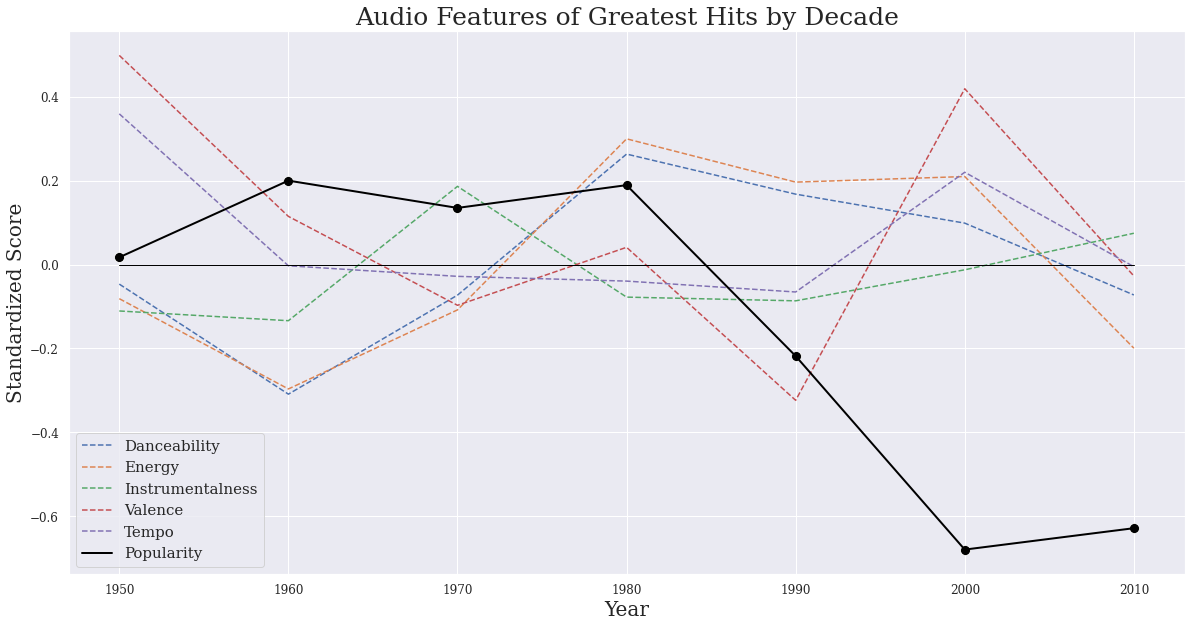

In [97]:
sns.set_theme(font="DejaVu Serif")

plt.rc('axes', labelsize = 20)
plt.rc('axes', titlesize = 25) 
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12) 

fig, ax = plt.subplots(figsize=(20, 10))

sns.lineplot(data = df_final, x = 'year', y = 'danceability', ci = None,  linestyle = 'dashed')
sns.lineplot(data = df_final, x = 'year', y = 'energy', ci = None,  linestyle = 'dashed')
sns.lineplot(data = df_final, x = 'year', y = 'instrumentalness', ci = None,  linestyle = 'dashed')
sns.lineplot(data = df_final, x = 'year', y = 'valence', ci = None,  linestyle = 'dashed')
sns.lineplot(data = df_final, x = 'year', y = 'tempo', ci = None,  linestyle = 'dashed')
sns.lineplot(data = df_final, x = 'year', y = 'popularity', ci = None, color = 'Black', linewidth = 2)
sns.lineplot(data = df_final, x = 'year', y = 0, color = 'Black', linewidth = 1)

sns.scatterplot(data = df_final, x = 'year', y = 'popularity', color = 'Black', marker = 'o', s = 100)

plt.legend(labels = ['Danceability', 'Energy', 'Instrumentalness', 'Valence', 'Tempo', 'Popularity'], 
           bbox_to_anchor = (0, 0, 0.5, 0.6), fontsize = 15)

ax.set(xlabel = 'Year', ylabel = 'Standardized Score', title = "Audio Features of Greatest Hits by Decade")

plt.close(2)
fig.savefig('data_story_1.png')
plt.show()